<h1 align="center">Assignment 2</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **K-Nearest-Neighbor (KNN) classification** on Newsgroups.

#### a. **[5 pts]** Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).


In [425]:
train_df = pd.read_csv(
    "newsgroups/trainMatrixModified.txt", delimiter="\t", header=None
)
train_labels_df = pd.read_csv(
    "newsgroups/trainClasses.txt", delimiter="\t", header=None, index_col=0
)
test_df = pd.read_csv("newsgroups/testMatrixModified.txt", delimiter="\t", header=None)
test_labels_df = pd.read_csv(
    "newsgroups/testClasses.txt", delimiter="\t", header=None, index_col=0
)
terms_df = pd.read_csv("newsgroups/modifiedterms.txt", header=None)

In [426]:
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [427]:
train_labels_df.head(10)

,1
0,
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,1
8,1


In [428]:
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [429]:
test_labels_df.head(10)

,1
0,
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0


In [430]:
term_frequencies = train_df.sum(axis=1)
term_frequencies.head(10)

0    102.0
1     11.0
2     22.0
3    959.0
4    222.0
5     84.0
6    108.0
7    262.0
8     55.0
9    318.0
dtype: float64

In [431]:
tf_sorted = term_frequencies.sort_values(ascending=False)
tf_sorted.head(20)

3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64

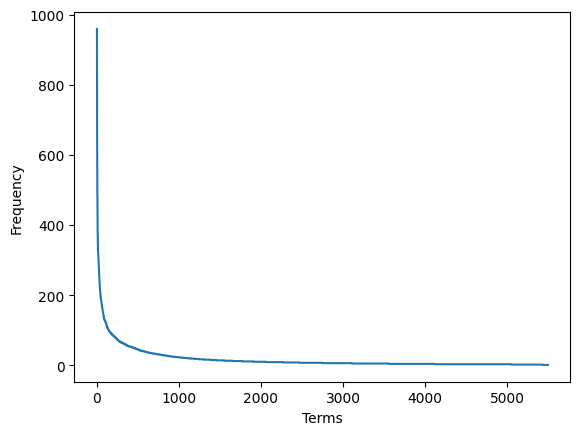

In [432]:
plt.plot(sorted(term_frequencies, reverse=True))
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

_First, I loaded the tab-delimited txt dataset as a dataframe using pandas read_csv function, which also works for txt files. Then I verified the imports with .head(10) to view the top 10 rows. Next, I summed the term frequencies across all documents in the training data using the row-wise operation (axis=1). Then I sorted the term frequencies in descending order and displayed the top 20 terms. Finally, I plotted the distribution of term frequencies in the training data. Since using tf_sorted directly would still include the terms as indices, I used sorted() to extract just the frequency values, which revealed the expected Zipf distribution._


#### b. **[10 pts]** Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.


In [433]:
def knn_search(x, train_X, K, distance_metric):
    """find K nearest neighbors of an instance x among the instances in train_X"""
    if distance_metric == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((train_X - x) ** 2).sum(axis=1))
    elif distance_metric == 1:
        # first find the vector norm for each instance in train_X as well as the norm for vector x
        train_X_norm = np.array(
            [np.linalg.norm(train_X[i]) for i in range(len(train_X))]
        )
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product of x and each instance in train_X by the product of the two norms
        cosine_sims = np.dot(train_X, x) / (train_X_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - cosine_sims
    idx = np.argsort(dists)  # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists


def knn_classify(x, train_X, K, labels, distance_metric):
    from collections import Counter

    neigh_idx, distances = knn_search(x, train_X, K, distance_metric)
    neigh_labels = labels[neigh_idx]
    # count how many neighbors belong to each class
    count = Counter(neigh_labels)
    # print("Labels for top", K, "neighbors:", count)
    x_pred_class = count.most_common(1)[0][0]
    return x_pred_class, neigh_idx

In [434]:
# converting TD to DT
train_X = train_df.to_numpy().T  # (800, 5500)
test_X = test_df.to_numpy().T  # (200, 5500)

train_labels_y = train_labels_df.to_numpy().flatten()  # (800, )

first_test_instance = test_X[0]
second_test_instance = test_X[1]

In [435]:
for name, metric in [("Euclidean", 0), ("Cosine", 1)]:
    print(f"{name} distance:")
    pred_1, idx_1 = knn_classify(
        first_test_instance, train_X, 5, train_labels_y, metric
    )
    pred_2, idx_2 = knn_classify(
        second_test_instance, train_X, 5, train_labels_y, metric
    )
    print(f"First test instance prediction: {pred_1}")
    print(f"Indices of first test instance: {idx_1}")
    print(f"Second test instance prediction: {pred_2}")
    print(f"Indices of second test instance: {idx_2}\n")

Euclidean distance:
First test instance prediction: 1
Indices of first test instance: [685 628 703 266 510]
Second test instance prediction: 0
Indices of second test instance: [798 554 757 224  38]

Cosine distance:
First test instance prediction: 1
Indices of first test instance: [685 628 667 152 427]
Second test instance prediction: 0
Indices of second test instance: [382 775 163 587 550]



_Here, I implemented the KNN classifier function following the example demonstrated in class. Since we need rows to represent samples and columns to represent features, I transposed the train and test dataframes by converting them to numpy arrays. Then, I used a for loop to test the KNN classifier on the first two test instances using both Euclidean and Cosine distance metrics in each case._


#### c. **[10 pts]** Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances).


In [436]:
test_labels_y = test_labels_df.to_numpy().flatten()

In [437]:
def classifier_eval(
    train_data, train_labels, test_data, test_labels, K, distance_metric
):
    correct_pred = 0
    total_instances = len(test_data)
    for doc in range(total_instances):
        test_data_pred, _ = knn_classify(
            test_data[doc], train_data, K, train_labels, distance_metric
        )
        if test_labels[doc] == test_data_pred:
            correct_pred += 1
    return correct_pred / total_instances

_To create the evaluation function, I first converted the test labels into a numpy array and flattened it to create a 1D array, similar to what I did with train_labels in part (b), since we need to compare predicted labels to test labels to calculate the accuracy. Then I used the knn_classify function created in (b) to obtain predictions for each test instance. I compared each prediction with the corresponding actual test label and summed the total correct predictions, which represents the sum of True Positives (TP) and True Negatives (TN). Finally, I returned the Classification Accuracy, which is the ratio of correct predictions to the total number of test instances._


#### d. **[10 pts]** Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).


In [438]:
euclidean_distance = []
cosine_similarity = []
for K in range(5, 101, 5):
    euclidean_distance.append(
        classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 0)
    )
    cosine_similarity.append(
        classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 1)
    )

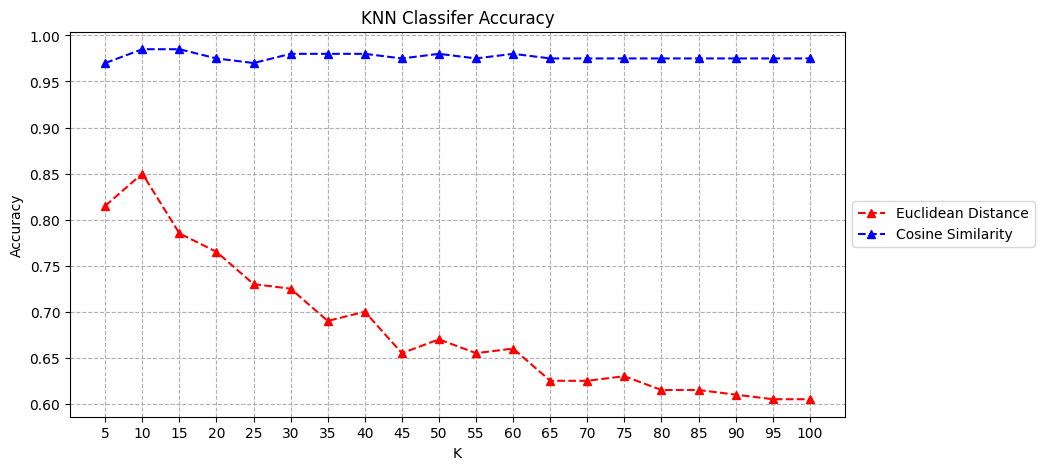

In [439]:
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10, 5))
plt.plot(Ks, euclidean_distance, "r^--", label="Euclidean Distance")
plt.plot(Ks, cosine_similarity, "b^--", label="Cosine Similarity")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

_I ran the evaluation function from part (c) for both Euclidean distance and Cosine similarity versions across a range of K values from 5 to 100 (in increments of 5). I stored the results in two arrays to plot the accuracy comparison between Euclidean distance and Cosine similarity for each K value. From this graph, we can observe that Cosine similarity achieves the highest peak accuracy and maintains higher average accuracy overall. The Euclidean distance metric shows declining accuracy on average as K increases, while Cosine similarity appears to be more stable and consistent across different K values._

#### e. **[10 pts]** Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.


In [440]:
# converting the train_df into document frequency (document counts for each term)
DF = pd.DataFrame((train_df != 0).sum(axis=1))
DF

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [441]:
# create a matrix with all entries
Nterms = train_df.shape[0]
NDocs = train_df.shape[1]

NMatrix = np.ones(np.shape(train_df), dtype=float) * NDocs
np.set_printoptions(precision=2, suppress=True, linewidth=120)
NMatrix

array([[800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       ...,
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.]], shape=(5500, 800))

In [442]:
# convert each entry into IDF values
IDF = np.log2(NMatrix / np.array(DF))
IDF

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]], shape=(5500, 800))

In [443]:
train_tfidf = train_df * IDF
pd.set_option("display.precision", 2)
train_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [444]:
# truncate the column of IDF to match the test_df for transformation
test_IDF = IDF[:, :200]
test_IDF.shape

(5500, 200)

In [445]:
test_tfidf = test_df * test_IDF
pd.set_option("display.precision", 2)
test_tfidf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [446]:
tfidf_cosine_similarity = []
train_tfidf = train_tfidf.to_numpy().T
test_tfidf = test_tfidf.to_numpy().T

for K in range(5, 101, 5):
    tfidf_cosine_similarity.append(
        classifier_eval(train_tfidf, train_labels_y, test_tfidf, test_labels_y, K, 1)
    )

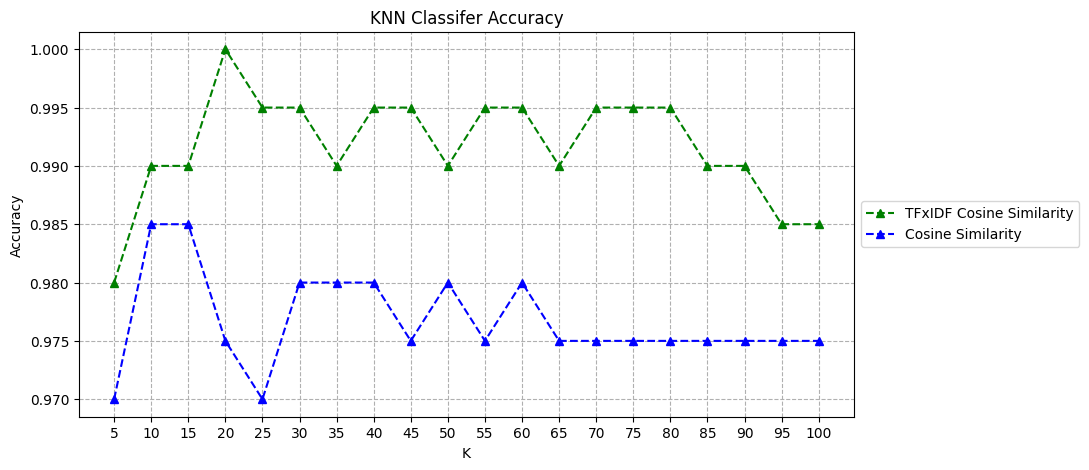

In [447]:
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10, 5))
plt.plot(Ks, tfidf_cosine_similarity, "g^--", label="TFxIDF Cosine Similarity")
plt.plot(Ks, cosine_similarity, "b^--", label="Cosine Similarity")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

_First, I calculated the document frequency (DF) from train_df by converting the matrix into boolean values (True if the term count is >0, False if =0), then summing row-wise to obtain the document frequency for each term. Next, I created a matrix with the same shape as train_df, with all values equal to the total number of training documents (NDocs), and used set_printoptions() for better readability since we will be performing log base 2 operations. I then calculated the IDF values and used them to compute TF × IDF weights for both the training and test datasets. For the test data, I applied the IDF values calculated from the training data, as suggested in class, to maintain consistency and avoid data leakage. Finally, similar to part (d), I reran the evaluation for the Cosine similarity version of the classifier across the same range of K values and created a chart comparing the results with and without using TFxIDF weights. The graph shows that using TFxIDF improves accuracy overall for cosine similarity and achieves perfect accuracy of 1.0 at K=20._

#### f. **[10 pts]** Create a new classifier based on the **Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization**. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, use your evaluation function to compare your results to the best KNN results you obtained in part **d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]**

In [448]:
# Rocchio Classification Implementation
def rocchio_train(train_data, train_labels):
    categories = np.unique(train_labels)
    proto_vec = {}
    
    for label in categories:
        proto_vec[label] = np.zeros(train_data.shape[1], dtype=float)
    
    for i in range(len(train_labels)):
        # add all (terms) values for each document 
        label = train_labels[i]
        proto_vec[label] += train_data[i]
        
    return proto_vec

In [449]:
prototype_vector = rocchio_train(train_X, train_labels_y)
prototype_vector

{np.int64(0): array([57.,  4.,  5., ...,  1.,  2.,  2.], shape=(5500,)),
 np.int64(1): array([45.,  7., 17., ...,  1.,  0.,  0.], shape=(5500,))}

In [450]:
def rocchio_classify(test_instance, prototype_vector):
    similarities = {}
    max_sim = -2
    predicted_class = None

    for label, prototype in prototype_vector.items():
        test_instance_norm = np.linalg.norm(test_instance)
        prototype_norm = np.linalg.norm(prototype)
        # Compute Cosine: divide the dot product of test instance and prototype by the product of the two norms
        if test_instance_norm > 0 and prototype_norm > 0:
            cosine_sims = np.dot(test_instance, prototype) / (test_instance_norm * prototype_norm)
        else:
            cosine_sims = 0.0

        similarities[label] = cosine_sims

        if cosine_sims > max_sim:
            max_sim = cosine_sims
            predicted_class = label
            
    return predicted_class, similarities

In [451]:
rocchio_classify(test_X[0], prototype_vector)

(np.int64(1),
 {np.int64(0): np.float64(0.1583833604068815),
  np.int64(1): np.float64(0.4412988961200159)})

In [452]:
rocchio_classify(test_X[1], prototype_vector)

(np.int64(0),
 {np.int64(0): np.float64(0.2872771676504734),
  np.int64(1): np.float64(0.09611312429340929)})

In [453]:
def rocchio_evaluate(test_data, test_labels, prototype):
    correct_pred = 0
    total_instances = len(test_data)
    for doc in range(total_instances):
        test_data_pred, _ = rocchio_classify(test_data[doc], prototype_vector)
        if test_data_pred == test_labels[doc]:
            correct_pred += 1
    return correct_pred / total_instances

In [454]:
rocchio_accuracy = rocchio_evaluate(test_X, test_labels_y, prototype_vector)
best_KNN_cosine_accuracy = max(cosine_similarity)
best_KNN_euclidean_accuracy = max(euclidean_distance)
print(f'Accuracy of Rocchio Algorithm: {rocchio_accuracy}')
print(f'Best Accuracy of KNN (Cosine Similarity) Algorithm: {best_KNN_cosine_accuracy}')
print(f'Accuracy of KNN (Euclidean Distance) Algorithm: {best_KNN_euclidean_accuracy}')

Accuracy of Rocchio Algorithm: 0.975
Best Accuracy of KNN (Cosine Similarity) Algorithm: 0.985
Accuracy of KNN (Euclidean Distance) Algorithm: 0.85


_I implemented the Rocchio (nearest centroid) method by separating the training, classification and evalutation functions. The training function computes prototype vectors for each categories (class labels) by adding all terms frequencies for each training documents belonging to that class label. The classification function calculates the cosine similarity between a test instance and each prototype vector, then predicts the class with the highest similarity. I tested the classifier on the first two test instances to verify it works correctly, showing both the predicted class and similarity values to each prototype. Finally, I compared the Rocchio classifier's accuracy using the evaluation function against the best KNN results from part (d). The Rocchio method is computationally more efficient than KNN as it only requires computing similarities to class prototypes rather than to all training instances but with the expense of accuracy. However, rocchio accuracy was higher than best KNN accuracy with Euclidean Distance and close to best KNN with Cosine Similarity._

#### f. **[5 pts]** Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn.

In [455]:
from sklearn.neighbors import NearestCentroid

# create and train scikit-learn's Nearest Centroid classifier
sklearn_nearest_centroid = NearestCentroid()
sklearn_nearest_centroid.fit(train_X, train_labels_y)

# predict for test data
sklearn_nc_pred = sklearn_nearest_centroid.predict(test_X)

total_doc = len(test_X)
correct_pred = 0

# calculate accuracy
for doc in range(total_doc):
    if sklearn_nc_pred[doc] == test_labels_y[doc]:
        correct_pred += 1
sklearn_nc_accuracy = correct_pred / total_doc

print(f'Accuracy of scikit-learn Nearest Centroid Algorithm: {sklearn_nc_accuracy}')
print(f'Accuracy of custom Rocchio Algorithm: {rocchio_accuracy}')

Accuracy of scikit-learn Nearest Centroid Algorithm: 0.94
Accuracy of custom Rocchio Algorithm: 0.975


_I used scikit-learn's Nearest Centroid classifier to perform classification on the test data, following the same approach as my custom Rocchio implementation. I then compared the classification accuracy between my implementation and scikit-learn's implementation, I found that my custom implementation scored higher accuracy, most probably because it only supports “euclidean” and “manhattan” metric and uses euclidean by default whereas my custom rocchio algorithm uses cosine similarity._

### 2. **Predictive Modeling with Census data**

#### a. **[5 pts]** Load the data into a Pandas dataframe. Create dummy variables for the categorical attributes. Then separate the attribute ("**income_>50K**") from the remaining attributes; this will be used as the target attribute for classification.  [Note: you need to drop "**income_<=50K**" which is also created as a dummy variable in earlier step]. Finally, split the transformed data into training and test sets (using 80%-20% **randomized** split). **Note**: use the **train_test_split** function from the **sklearn.model_selection** module with **random_state = 111** to perform the split.

In [456]:
census_df = pd.read_csv('adult-sample-10-01-2025.csv')
census_df.head(10)

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,income
0,58.0,Private,13,Never-married,Prof-specialty,White,Female,62,<=50K
1,24.0,Private,13,Never-married,Exec-managerial,White,Female,40,<=50K
2,58.0,Public,13,Married,Exec-managerial,Black,Male,40,>50K
3,31.0,Public,13,Never-married,Prof-specialty,White,Female,40,<=50K
4,45.0,Private,10,Divorced,Sales,White,Male,40,<=50K
5,23.0,Private,5,Separated,Other-service,White,Male,40,<=50K
6,39.0,Public,9,Married,Adm-clerical,Asian-Pac-Islander,Female,20,<=50K
7,32.0,Public,13,Never-married,Adm-clerical,White,Male,37,<=50K
8,36.0,Self-employed,16,Separated,Prof-specialty,White,Female,10,<=50K
9,20.0,Private,10,Never-married,Sales,White,Female,30,<=50K


In [457]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             12000 non-null  float64
 1   workclass       12000 non-null  object 
 2   education-num   12000 non-null  int64  
 3   marital-status  12000 non-null  object 
 4   occupation      12000 non-null  object 
 5   race            12000 non-null  object 
 6   sex             12000 non-null  object 
 7   hours-per-week  12000 non-null  int64  
 8   income          12000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 843.9+ KB


In [458]:
for col in census_df.columns:
    print(col)
    print(census_df[col].unique())

age
[58.   24.   31.   45.   23.   39.   32.   36.   20.   22.   60.   35.   51.   47.   29.   25.   26.   21.   38.
 30.   17.   19.   41.   56.   73.   55.   28.   61.   59.   18.   37.   33.   53.   46.   50.   65.   44.   42.
 75.   49.   90.   43.   68.   66.   34.   52.   27.   48.   40.   62.   67.   64.   54.   85.   70.   57.   38.58
 63.   72.   78.   76.   81.   69.   71.   77.   74.   80.   82.   83.   79.   84.  ]
workclass
['Private' 'Public' 'Self-employed' 'Without-pay']
education-num
[13 10  5  9 16 12 11 15  7  4  8 14  6  3  2  1]
marital-status
['Never-married' 'Married' 'Divorced' 'Separated' 'Married-spouse-absent' 'Widowed']
occupation
['Prof-specialty' 'Exec-managerial' 'Sales' 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Handlers-cleaners' 'Protective-serv' 'Machine-op-inspct' 'Tech-support' 'Priv-house-serv'
 'Armed-Forces']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Female' 'Male']
ho

In [459]:
# create dummy variables for workclass, marital-status, occupation, race, sex and income
cat_cols = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'income']
new_census_df = pd.get_dummies(census_df, columns=cat_cols)
new_census_df.head(10)

,age,education-num,hours-per-week,workclass_Private,workclass_Public,workclass_Self-employed,workclass_Without-pay,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,...,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,58.0,13,62,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
1,24.0,13,40,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,58.0,13,40,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,31.0,13,40,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
4,45.0,10,40,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
5,23.0,5,40,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
6,39.0,9,20,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
7,32.0,13,37,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
8,36.0,16,10,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
9,20.0,10,30,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


In [460]:
census_target_y = new_census_df[['income_>50K']]
census_target_y.head(10)

,income_>50K
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [461]:
new_census_df.drop(columns=['income_>50K','income_<=50K'], inplace=True)
new_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   12000 non-null  float64
 1   education-num                         12000 non-null  int64  
 2   hours-per-week                        12000 non-null  int64  
 3   workclass_Private                     12000 non-null  bool   
 4   workclass_Public                      12000 non-null  bool   
 5   workclass_Self-employed               12000 non-null  bool   
 6   workclass_Without-pay                 12000 non-null  bool   
 7   marital-status_Divorced               12000 non-null  bool   
 8   marital-status_Married                12000 non-null  bool   
 9   marital-status_Married-spouse-absent  12000 non-null  bool   
 10  marital-status_Never-married          12000 non-null  bool   
 11  marital-status_

In [462]:
# split to train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_census_df, census_target_y, test_size=0.2, random_state=111)
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (9600, 34)
X_test Shape: (2400, 34)
y_train Shape: (9600, 1)
y_test Shape: (2400, 1)


_First I loaded the data into pandas dataframe and created dummy variables for all the categorical attributes using pandas get_dummies() function to create a new dataframe. Then created a new target dataframe with attribute income_>50K from the new dataframe and dropped both the income_>50K and income_<=50K columns from the new_census_df. Hence, we have the data and labels. I used sklearn's model_selection module to get the train_test_split and split our data and labels into train/test split 80%/20% respectively._

#### b. **[15 pts]** Use scikit-learn's KNN implementation for classification.

#### i. First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.

In [463]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# normalizing the data with MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the training data and transform
X_train_norm = scaler.fit_transform(X_train)
# transform the testing data with the same scaler
X_test_norm = scaler.transform(X_test)

In [464]:
X_train_norm

array([[0.66, 0.4 , 0.59, ..., 1.  , 0.  , 1.  ],
       [0.22, 0.13, 0.4 , ..., 0.  , 1.  , 0.  ],
       [0.03, 0.53, 0.4 , ..., 1.  , 0.  , 1.  ],
       ...,
       [0.58, 0.53, 0.38, ..., 1.  , 1.  , 0.  ],
       [0.15, 0.53, 0.4 , ..., 1.  , 0.  , 1.  ],
       [0.4 , 0.6 , 0.4 , ..., 1.  , 1.  , 0.  ]], shape=(9600, 34))

In [465]:
X_test_norm

array([[0.04, 0.6 , 0.4 , ..., 0.  , 1.  , 0.  ],
       [0.44, 0.87, 0.4 , ..., 0.  , 1.  , 0.  ],
       [0.34, 0.6 , 0.4 , ..., 1.  , 0.  , 1.  ],
       ...,
       [0.  , 0.33, 0.04, ..., 1.  , 1.  , 0.  ],
       [0.59, 0.67, 0.19, ..., 1.  , 0.  , 1.  ],
       [0.34, 0.4 , 0.4 , ..., 1.  , 0.  , 1.  ]], shape=(2400, 34))

In [466]:
# coverting the train and test target dataframe to numpy array
y_train = y_train.to_numpy().flatten()
y_train

array([ True, False, False, ..., False, False, False], shape=(9600,))

In [467]:
y_test = y_test.to_numpy().flatten()
y_test

array([False,  True, False, ..., False, False, False], shape=(2400,))

In [468]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train_norm, y_train)
knn_prediction = knn_classifier.predict(X_test_norm)
knn_prediction

array([False, False, False, ..., False, False, False], shape=(2400,))

In [469]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_test, knn_prediction)
knn_confusion_matrix

array([[1653,  157],
       [ 260,  330]])

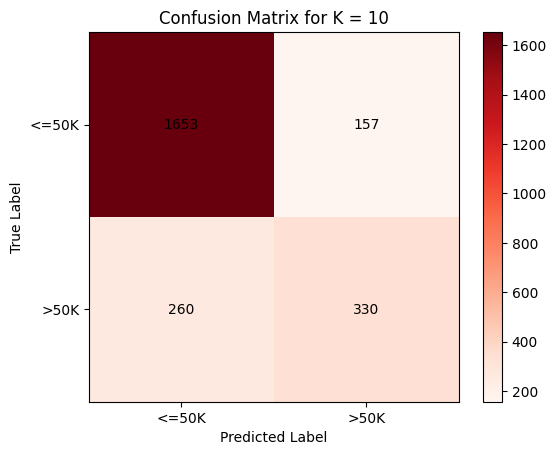

In [470]:
# using matplotlib to plot the confusion matrix
plt.imshow(knn_confusion_matrix, cmap='Reds')
plt.title('Confusion Matrix for K = 10')

classes = ['<=50K', '>50K']

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.colorbar()

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(knn_confusion_matrix.shape[0]):
    for j in range(knn_confusion_matrix.shape[1]):
        plt.text(j, i, knn_confusion_matrix[i, j], ha="center", va="center", color="black")

plt.show()

In [471]:
# generate classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_prediction, target_names=classes))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      1810
        >50K       0.68      0.56      0.61       590

    accuracy                           0.83      2400
   macro avg       0.77      0.74      0.75      2400
weighted avg       0.82      0.83      0.82      2400



In [472]:
# model accuracy for both training and test sets
train_accuracy = knn_classifier.score(X_train_norm, y_train)
test_accuracy = knn_classifier.score(X_test_norm, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8461458333333334
Test Accuracy: 0.82625


_I used MinMaxScaler to normalize the train and test data to values between 0 and 1 then ran KNN classifer using scikit-learn library for K=10. I thought about using the scikit-learn's ConfusionMatrixDisplay function but since the question said visualize using Matplotlib I manually created the confusion matrix plot to display that. Then generated classification report and used score() method on knn classifier to get the training and test accuracy._

#### ii. Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these hyperparameters (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [473]:
uniform_knn = []
weighted_knn = []

for K in range(5, 101, 1):
    uniform_knn_clf = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    uniform_knn_clf.fit(X_train_norm, y_train)
    uniform_knn.append(
        uniform_knn_clf.score(X_test_norm, y_test)
    )
    weighted_knn_clf = KNeighborsClassifier(n_neighbors=K, weights='distance')
    weighted_knn_clf.fit(X_train_norm, y_train)
    weighted_knn.append(
        weighted_knn_clf.score(X_test_norm, y_test)
    )

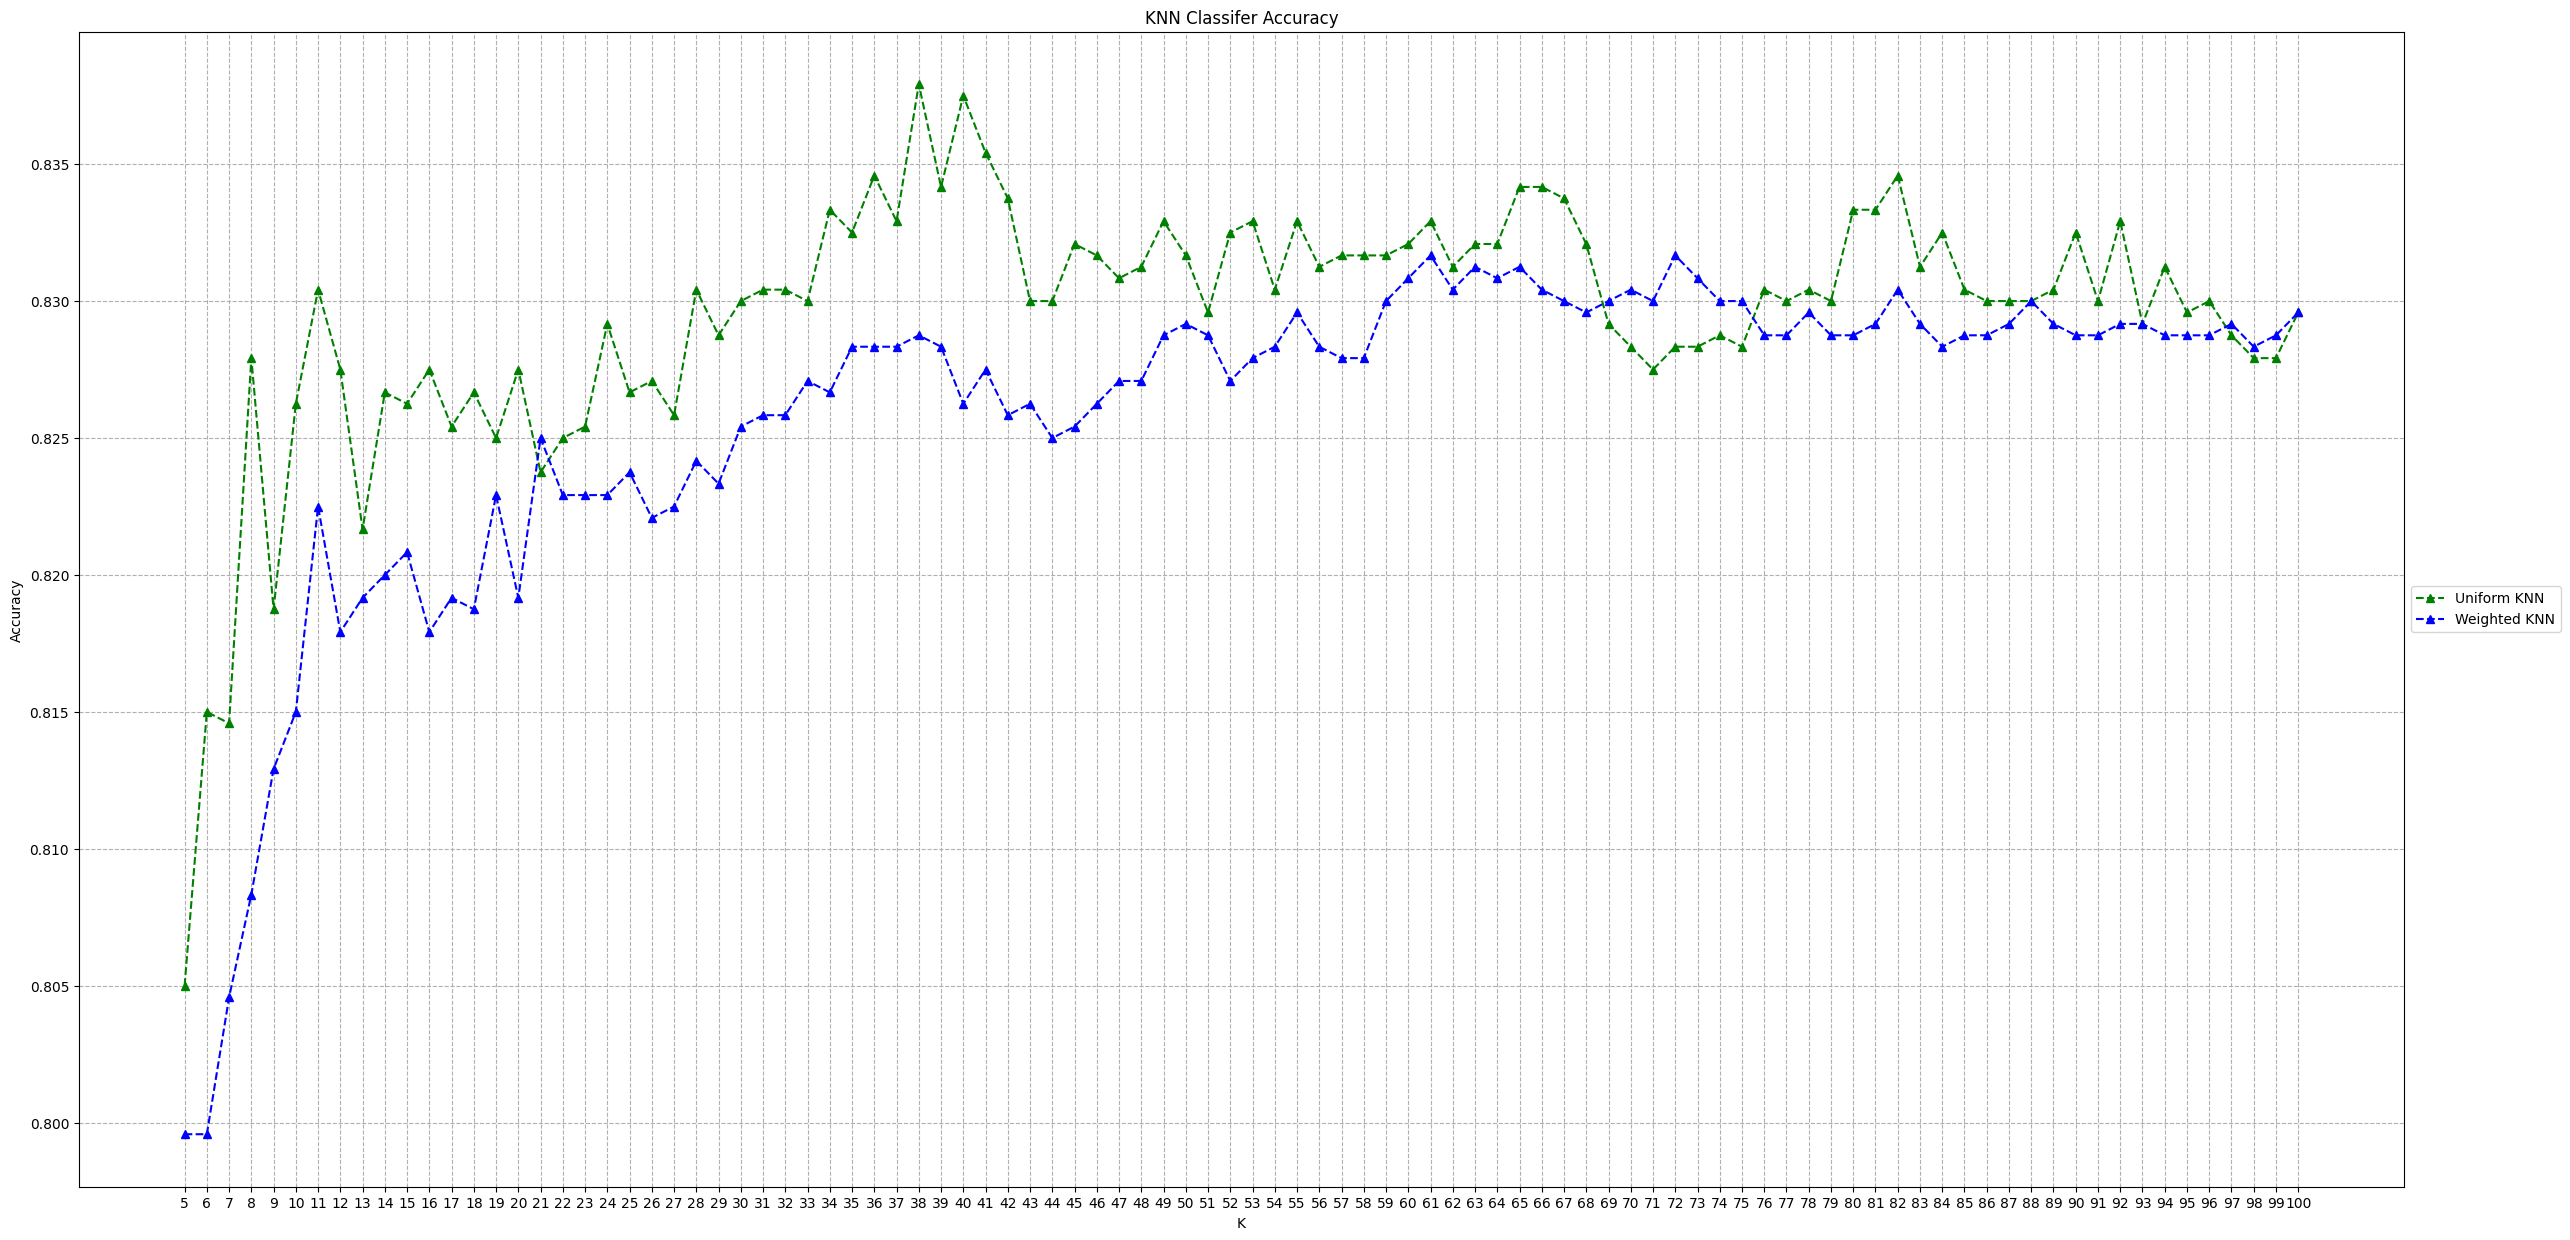

In [474]:
Ks = list(range(5, 101, 1))
plt.figure(figsize=(30, 15))
plt.plot(Ks, uniform_knn, "g^--", label="Uniform KNN")
plt.plot(Ks, weighted_knn, "b^--", label="Weighted KNN")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [475]:
best_uniform_knn_acc = max(uniform_knn)
best_weighted_knn_acc = max(weighted_knn)

best_uniform_K = uniform_knn.index(best_uniform_knn_acc) + 5
best_weighted_K = weighted_knn.index(best_weighted_knn_acc) + 5

print(f'Best K for uniform KNN classifier: {best_uniform_K}')
print(f'Best K for weighted KNN classifier: {best_weighted_K}')

Best K for uniform KNN classifier: 38
Best K for weighted KNN classifier: 61


In [476]:
best_uniform_knn = KNeighborsClassifier(n_neighbors=best_uniform_K, weights='uniform')
best_uniform_knn.fit(X_train_norm, y_train)
print(f'Best Accuracy of uniform KNN classifier on Training Data: {best_uniform_knn.score(X_train_norm, y_train)}')
print(f'Best Accuracy of uniform KNN classifier on Test Data: {best_uniform_knn.score(X_test_norm, y_test)} \n')

best_weighted_knn = KNeighborsClassifier(n_neighbors=best_weighted_K, weights='distance')
best_weighted_knn.fit(X_train_norm, y_train)
print(f'Best Accuracy of weighted KNN classifier on Training Data: {best_weighted_knn.score(X_train_norm, y_train)}')
print(f'Best Accuracy of weighted KNN classifier on Test Data: {best_weighted_knn.score(X_test_norm, y_test)}')

Best Accuracy of uniform KNN classifier on Training Data: 0.8303125
Best Accuracy of uniform KNN classifier on Test Data: 0.8379166666666666 

Best Accuracy of weighted KNN classifier on Training Data: 0.9786458333333333
Best Accuracy of weighted KNN classifier on Test Data: 0.8316666666666667


_I experimented with K values from 5 to 100 for both distance weighting and without distance weighting to get the best K hyperparameter that had the highest accuracy for each. I also created a single plot comparing distance and uniform weighting schemes across the different values of K. Then used the best K's to get the accuracy on training and test data._

#### iii. Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. Your figure may look similar (but bit not exactly the same) as depicted in this image. What range of values of K represent overfitting? Briefly explain.

In [477]:
train_knn = []
test_knn = []

for K in range(5, 101, 1):
    knn_clf = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    knn_clf.fit(X_train_norm, y_train)
    train_knn.append(
        knn_clf.score(X_train_norm, y_train)
    )
    test_knn.append(
        knn_clf.score(X_test_norm, y_test)
    )

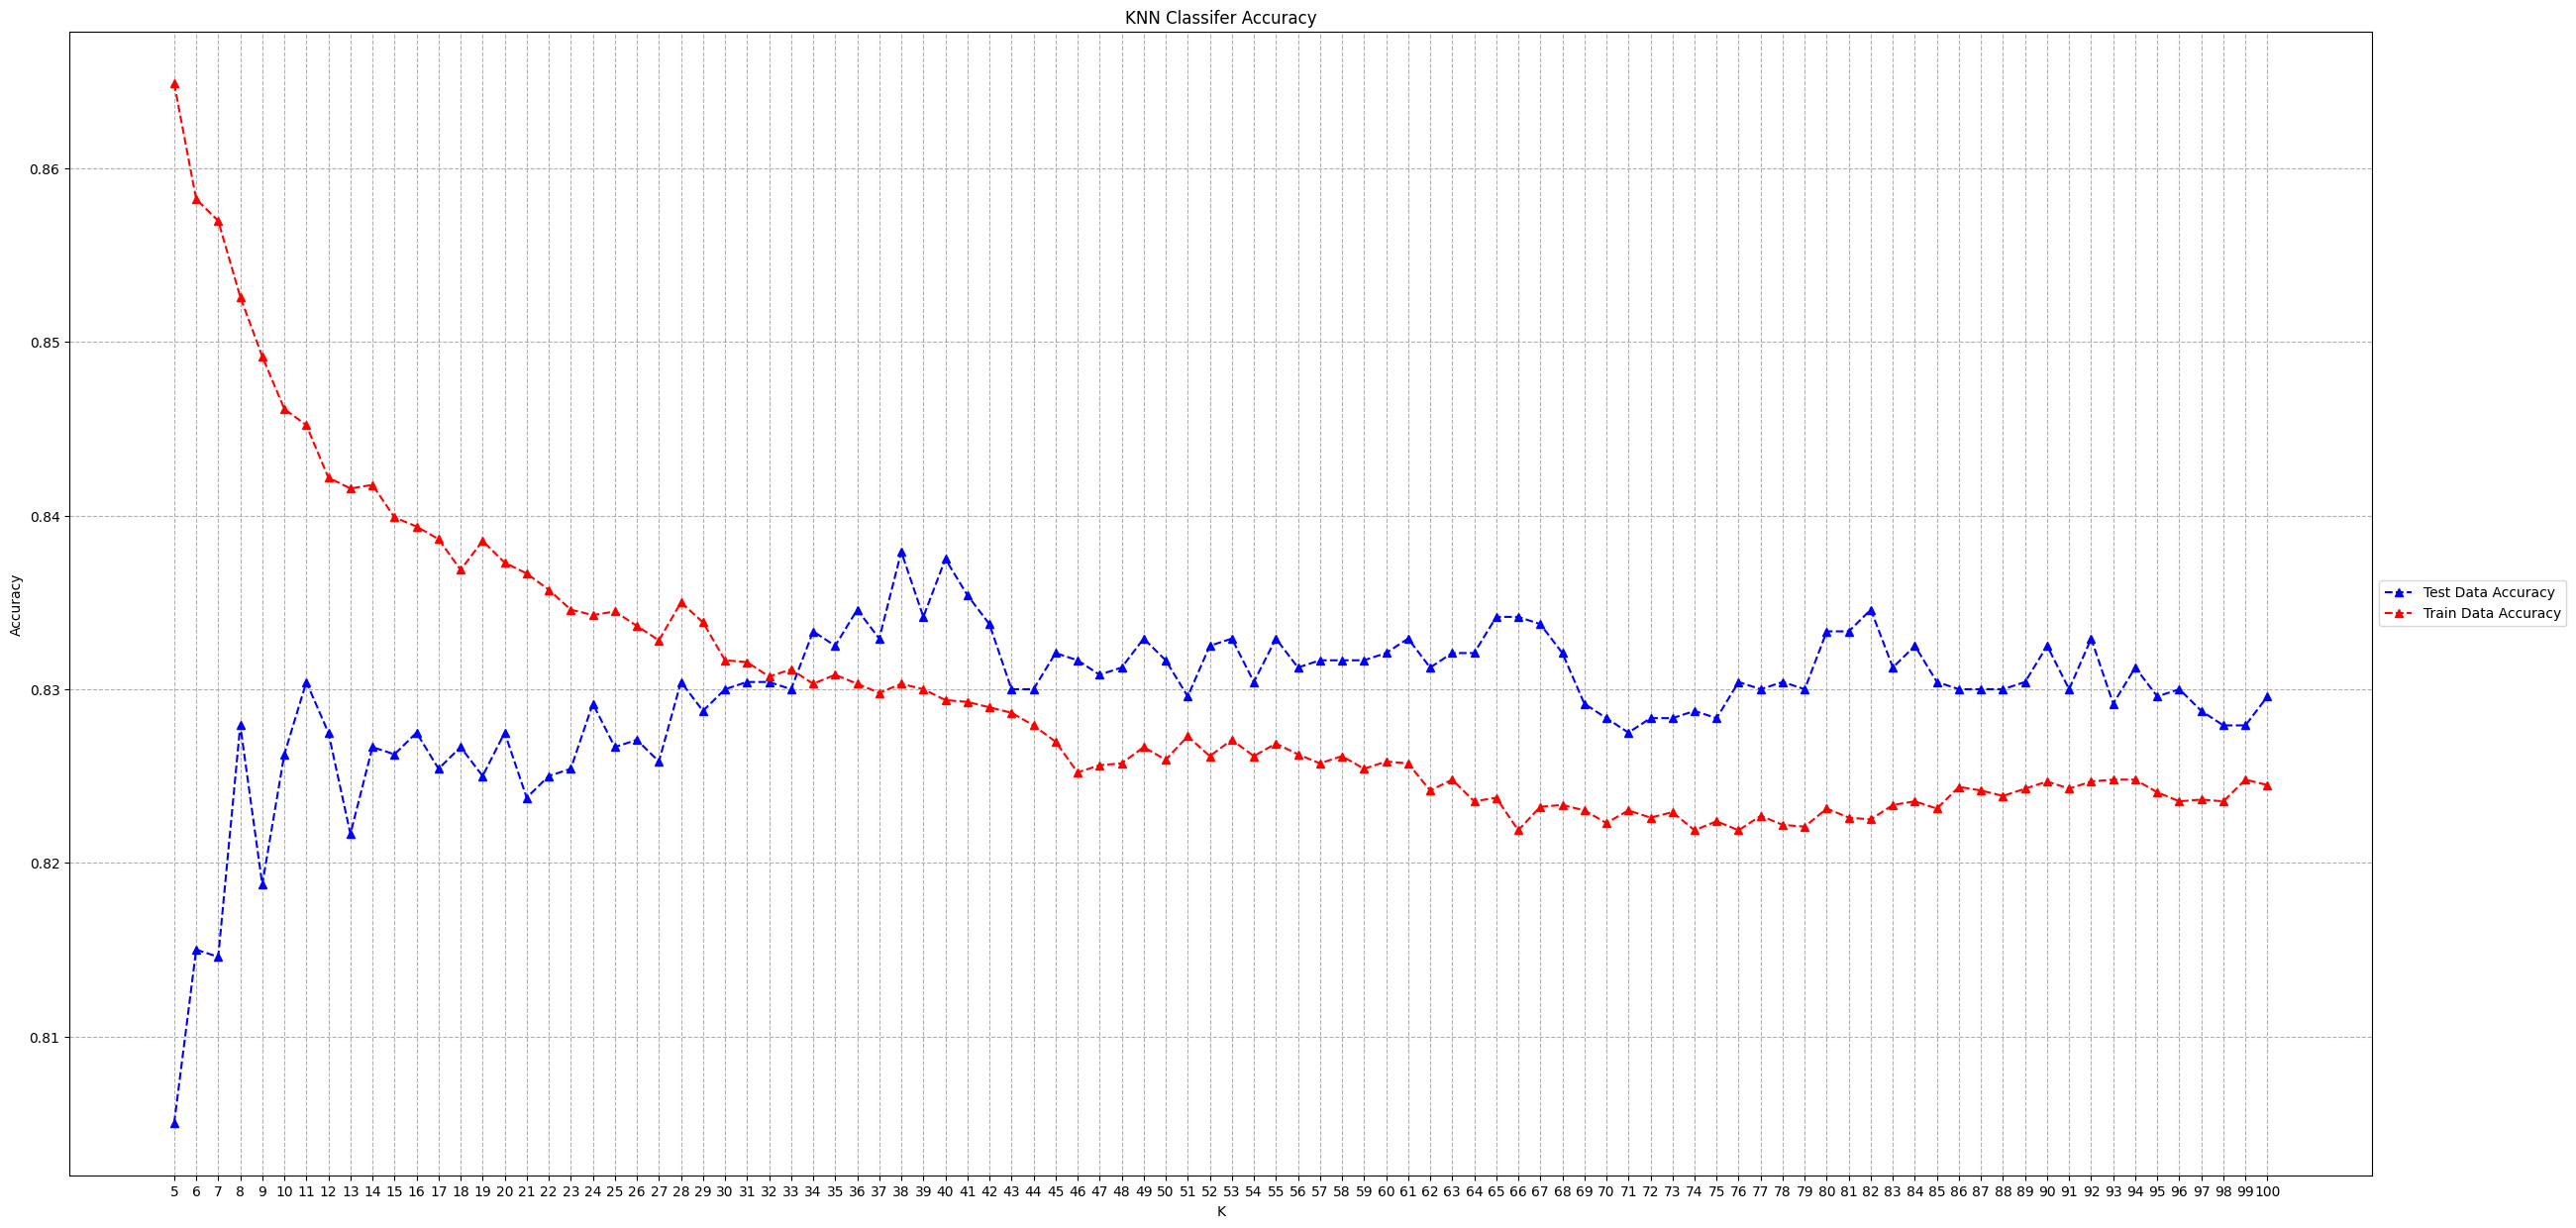

In [478]:
Ks = list(range(5, 101, 1))
plt.figure(figsize=(30, 15))
plt.plot(Ks, test_knn, "b^--", label="Test Data Accuracy")
plt.plot(Ks, train_knn, "r^--", label="Train Data Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

_Apporximately from K = 5 to K = 13-20 likely represents overfitting which is indicated by a significant gap between training accuracy and test accuracy which shows that the model fits the training data very well but show poor generalization to new data (test data). This indicates that the model has memorized the training data pattern really well rather than learning which suggests high variance. As the K increases the gap narrows, the model shows less overfitting and less variance._

#### c. **[10 pts]** Using the **non-normalized** training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, **min_samples_split**=10, and **max_depth**=4. Show the accuracy results for both the training and test sets.

In [479]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
dt_pred

array([False, False, False, ..., False, False, False], shape=(2400,))

In [480]:
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm

array([[1513,  297],
       [ 268,  322]])

In [481]:
print(classification_report(y_test, dt_pred, target_names=classes))

              precision    recall  f1-score   support

       <=50K       0.85      0.84      0.84      1810
        >50K       0.52      0.55      0.53       590

    accuracy                           0.76      2400
   macro avg       0.68      0.69      0.69      2400
weighted avg       0.77      0.76      0.77      2400



In [482]:
dt_train_accuracy = dt_clf.score(X_train, y_train)
print(f'Average accuracy score of the classifier on Training data: {dt_train_accuracy}')

dt_test_accuracy = dt_clf.score(X_test, y_test)
print(f'Average accuracy score of the classifier on Testing data: {dt_test_accuracy}')

Average accuracy score of the classifier on Training data: 0.9786458333333333
Average accuracy score of the classifier on Testing data: 0.7645833333333333


In [483]:
new_dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
new_dt_clf.fit(X_train, y_train)

new_dt_pred = new_dt_clf.predict(X_test)
new_dt_pred

array([False, False, False, ..., False, False, False], shape=(2400,))

In [484]:
new_dt_cm = confusion_matrix(y_test, new_dt_pred)
new_dt_cm

array([[1721,   89],
       [ 321,  269]])

In [485]:
print(classification_report(y_test, new_dt_pred, target_names=classes))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      1810
        >50K       0.75      0.46      0.57       590

    accuracy                           0.83      2400
   macro avg       0.80      0.70      0.73      2400
weighted avg       0.82      0.83      0.81      2400



In [486]:
new_dt_train_accuracy = new_dt_clf.score(X_train, y_train)
print(f'Average accuracy score of the new classifier on Training data: {new_dt_train_accuracy}')

new_dt_test_accuracy = new_dt_clf.score(X_test, y_test)
print(f'Average accuracy score of the new classifier on Testing data: {new_dt_test_accuracy}')

Average accuracy score of the new classifier on Training data: 0.82
Average accuracy score of the new classifier on Testing data: 0.8291666666666667


_From comparing the average accuracy score on the test and training dataset on the default decision tree classifier, it shows high training accuracy (97.86%) but lower testing accuracy (76.5%), with a significant gap of around 21%. This suggests high variance (overfitting), indicating that the model captured noise and specific patterns from the training data but doesn't generalize well to new data. The default model is very complex with low bias but high variance. In contrast, the new decision tree model with constrained parameters (max_depth=4, min_samples_split=10) shows training accuracy of 82% and test accuracy of 82.9%, with minimal gap. This indicates a better bias-variance trade-off: slightly higher bias (less complex model) but significantly lower variance (better generalization), resulting in improved test performance and reduced overfitting._

#### d. **[10 pts]** Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

In [487]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Naive Bayes (Gaussian)
nb_clf = GaussianNB()
nb_cv_scores = cross_val_score(nb_clf, X_train, y_train, cv=10)
nb_cv_accuracy = nb_cv_scores.mean()
print(f'Overall average score of 10 fold cross validation on training data: {nb_cv_accuracy:.4f}')

Overall average score of 10 fold cross validation on training data: 0.5651


In [488]:
# train on full training data
nb_clf.fit(X_train, y_train)
nb_train_accuracy = nb_clf.score(X_train, y_train)
nb_test_accuracy = nb_clf.score(X_test, y_test)

print('Naive Bayes (Gaussian) Results:')
print(f"10-fold cross-validation accuracy: {nb_cv_accuracy:.4f}")
print(f"Model accuracy on the training data: {nb_train_accuracy:.4f}")
print(f"Model accuracy on the test data: {nb_test_accuracy:.4f}")

Naive Bayes (Gaussian) Results:
10-fold cross-validation accuracy: 0.5651
Model accuracy on the training data: 0.5742
Model accuracy on the test data: 0.5692


In [489]:
# linear discriminant analysis (LDA)
lda_clf = LinearDiscriminantAnalysis()
lda_cv_scores = cross_val_score(lda_clf, X_train, y_train, cv=10)
lda_cv_accuracy = lda_cv_scores.mean()
print(f'Overall average score of 10 fold cross validation on training data: {lda_cv_accuracy:.4f}')

Overall average score of 10 fold cross validation on training data: 0.8203


In [490]:
# train on full training data
lda_clf.fit(X_train, y_train)
lda_train_accuracy = lda_clf.score(X_train, y_train)
lda_test_accuracy = lda_clf.score(X_test, y_test)

print("Linear Discriminant Analysis (LDA) Results:")
print(f"10-fold cross-validation accuracy: {lda_cv_accuracy:.4f}")
print(f"Model accuracy on the training data: {lda_train_accuracy:.4f}")
print(f"Model accuracy on the test data: {lda_test_accuracy:.4f}")

Linear Discriminant Analysis (LDA) Results:
10-fold cross-validation accuracy: 0.8203
Model accuracy on the training data: 0.8211
Model accuracy on the test data: 0.8400


_I implemented both Gaussian Naive Bayes and Linear Discriminant Analysis classifiers using scikit-learn. For each classifier, I performed 10-fold cross-validation on the training data to assess model performance. The cross-validation accuracy provides a more robust estimate of model performance by training and evaluating on different subsets of the training data. I then compared the cross-validation accuracy to the full training accuracy. Finally, I evaluated both models on the set-aside 20% test data to assess their performance. The 10-fold CV accuracy helps detect overfitting: if training accuracy is much higher than CV accuracy, the model is likely overfitting._